In [1]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# df['job_skills'] = df['job_skills'].apply(ast.literal_eval)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

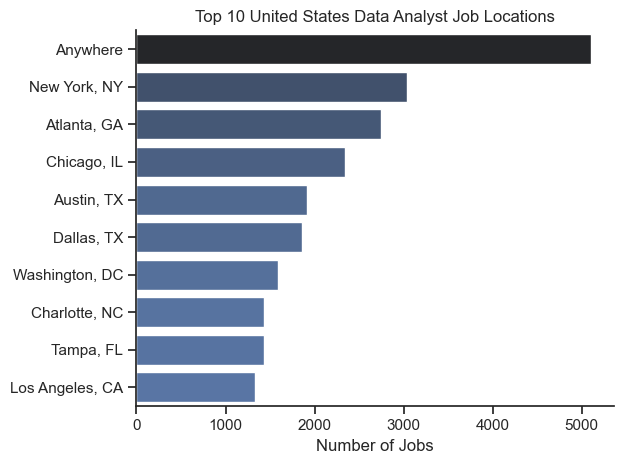

In [13]:
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', dodge=False, legend=False)
sns.despine()
# sns.despine(left=True, bottom=True)
plt.title('Top 10 United States Data Analyst Job Locations')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()



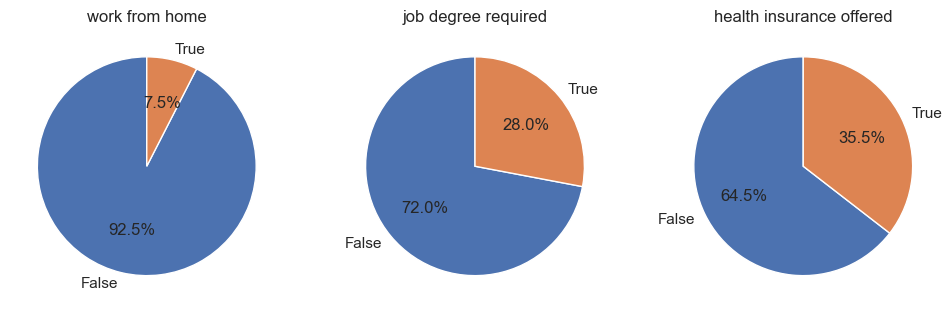

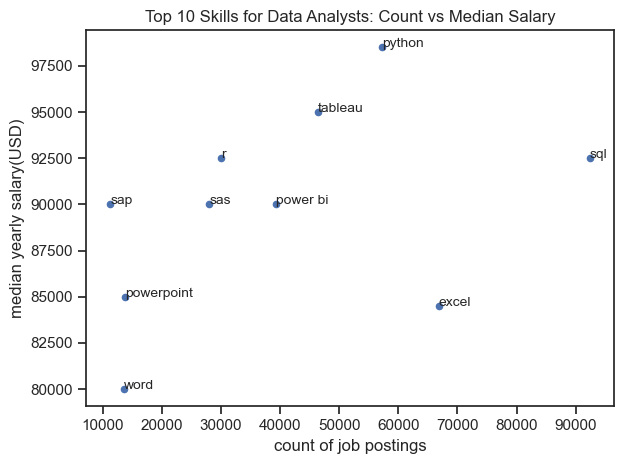

In [14]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

dict_column={
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'job degree required',
    'job_health_insurance': 'health insurance offered'
}
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
plt.show()
df_scatter = df[df['job_title_short'] == 'Data Analyst']
df_scatter_exploded = df_scatter.explode('job_skills')
skill_stats = df_scatter_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median') 
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Top 10 Skills for Data Analysts: Count vs Median Salary')
plt.xlabel('count of job postings')
plt.ylabel('median yearly salary(USD)')
plt.tight_layout()

for w, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[w], skill_stats['median_salary'].iloc[w], txt, fontsize=10)
    # plt.text(skill_stats.iloc[w]['skill_count'], skill_stats.iloc[w]['median_salary'], txt, fontsize=10)
    # plt.annotate(txt, (skill_stats.iloc[w]['skill_count'], skill_stats.iloc[w]['median_salary']), fontsize=10)

plt.show()


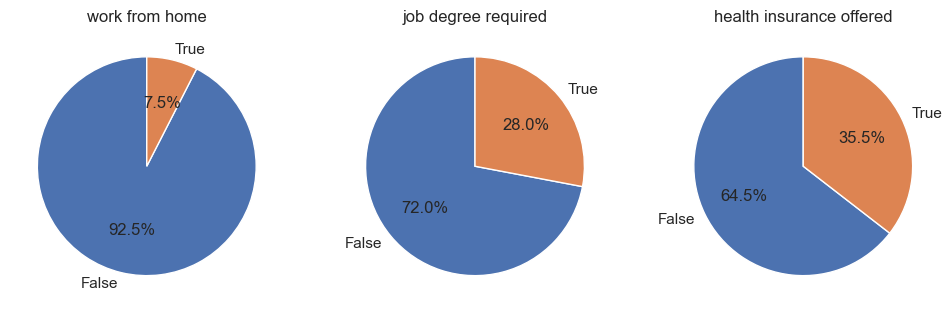

In [15]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

dict_column={
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'job degree required',
    'job_health_insurance': 'health insurance offered'
}
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
plt.show()

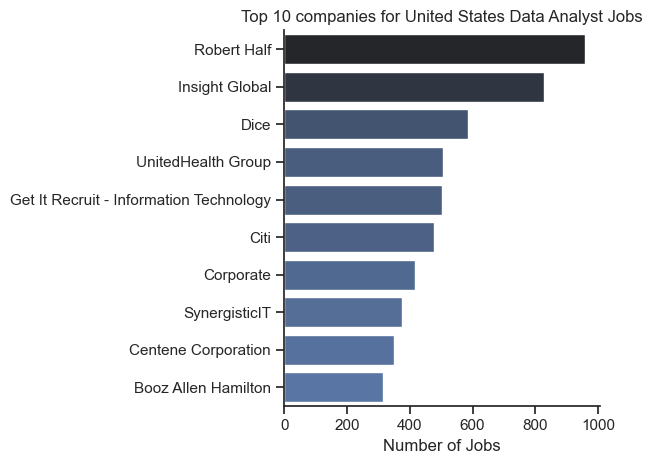

In [17]:
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', dodge=False, legend=False)
sns.despine()
# sns.despine(left=True, bottom=True)
plt.title('Top 10 companies for United States Data Analyst Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.tight_layout()
plt.show()

